# Titanic Prediction

## Plan of Attack
- Understand the data, size of the data (column/row), size of missing data, columns to drop
- Data Cleaning
    - data outliers
    - correct the data
    - fillna()
- EDA, look at numarical and object(string) data seperatly, to determine
    - normalization/scale the data
    - determine potential feature engineering approaches
- Feature Engineering according to the findings
- Def function for data preprocessing
- Run Models
- Voting
- Output the result

## Setup the Enviroment

In [8]:
# This block is from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import seaborn as sns #collection of functions for data visualization
print("seaborn version: {}". format(sns.__version__))

from sklearn.preprocessing import OneHotEncoder #OneHot Encoder


#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.1
seaborn version: 0.10.0
-------------------------


In [9]:
#this is from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
#mpl.style.use('ggplot')
#sns.set_style('white')
#pylab.rcParams['figure.figsize'] = 12,8

In [10]:
#load data
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

### Understand the data

In [20]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train_raw.info()
train_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observation
- This data consist of numaric, string (object), and the Ticket column contains a combination of string and numarical values
- We have a total 12 columns
- Age has some missing data, marjority of Cabin data are missing, two missing values in Embarked
- judging from std, min and max, we can conclude that data in PassengerId are pretty evenly distributed

#### Plan of action
- Split the data by dtype (string vs numeric) for targeted actions
- Need to handle missing data in Age, Cabin (drop, due to the large amount), and Embarked
- Consider dropping PassengerId due to the lack of trend in the data


### Data Cleaning

In [22]:
#let split the data for more targeted handling
txt_cols = [cname for cname in train_raw.columns if train_raw[cname].dtype == "object"]

# Select numerical columns
num_cols = [cname for cname in train_raw.columns if train_raw[cname].dtype in ['int64', 'float64']]

txt_data = train_raw[txt_cols].copy()
num_data = train_raw[num_cols].copy()

In [23]:
# to make sure we didn't accidentally drop any cols
txt_data.shape[1] + num_data.shape[1] == train_raw.shape[1]

True

#### Numeric Cols

In [24]:
#now let us look at the numaric cols
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [25]:
age_missing_per = num_data.Age.isnull().sum()/len(num_data.Age)
print("{:.2%}".format(age_missing_per))

19.87%


We have close to 20% of Age data that are missing from the dataset, let's think of a cleverer way to fill in the gaps
- the idea is to find corrolating features with Age, create a lookup table to impute missing Age values

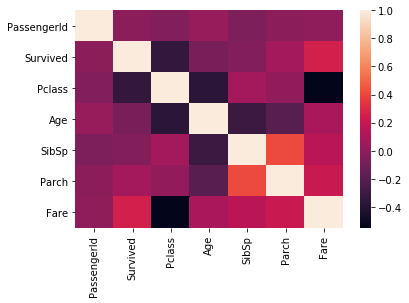

In [26]:
# to find corrolating features
sns.heatmap(train_raw.corr())

In [27]:
#we see that Pclass, Sibsp, Parch are highly corrolated with Age
Pclass_Sibsp_Parch = train_raw['Pclass'].apply(str)+'-'+train_raw['SibSp'].apply(str)+'-'+train_raw['Parch'].apply(str)
Pclass_Sibsp_Parch.value_counts()

3-0-0    324
1-0-0    109
2-0-0    104
1-1-0     51
3-1-0     46
2-1-0     26
3-1-1     25
2-1-1     20
1-0-1     19
1-1-1     12
3-0-2     12
3-0-1     11
3-2-0     10
1-0-2      9
3-4-2      9
3-4-1      9
2-1-2      8
2-0-2      8
2-0-1      8
3-3-1      7
3-8-2      7
1-1-2      7
3-5-2      5
3-1-2      4
3-3-2      4
2-2-1      4
1-3-2      3
3-2-1      3
2-2-0      3
1-2-0      3
3-1-5      3
3-0-5      2
3-2-2      2
1-2-2      2
3-1-4      2
3-1-3      2
3-0-3      1
2-2-3      1
2-1-3      1
3-1-6      1
3-0-4      1
1-1-4      1
2-3-0      1
3-3-0      1
dtype: int64

300, 100, 200 have the most values, let's create a look up table with 4 classes, 300, 100, 200 and others respectively 

In [28]:
frame = { 'Pclass_Sibsp_Parch': Pclass_Sibsp_Parch, 'Age': train_raw.Age } 
age_psp = pd.DataFrame(frame)

In [29]:
age_classes = ['3-0-0', '1-0-0', '2-0-0']

In [30]:
age_psp['Pclass_Sibsp_Parch'] = age_psp['Pclass_Sibsp_Parch'].apply(lambda x: x if x in age_classes else 'other')
age_psp['Pclass_Sibsp_Parch'].value_counts()

other    354
3-0-0    324
1-0-0    109
2-0-0    104
Name: Pclass_Sibsp_Parch, dtype: int64

In [31]:
age_lookup= age_psp.groupby("Pclass_Sibsp_Parch", as_index=False).mean()
age_lookup = age_lookup.set_index('Pclass_Sibsp_Parch')

In [32]:
num_data['temp_psp'] = age_psp['Pclass_Sibsp_Parch']
num_data['temp_age_cat_mean'] = num_data['temp_psp']
num_data['temp_age_cat_mean'] = num_data['temp_age_cat_mean'].apply(lambda x: age_lookup['Age'][x])
num_data['Age'] = num_data['Age'].fillna(num_data['temp_age_cat_mean'])

In [33]:
num_data['Age'].isnull().sum()

0

In [34]:
num_data = num_data.drop('temp_psp', axis=1)
num_data = num_data.drop('temp_age_cat_mean', axis=1)

In [35]:
num_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

Let's take a closer look at 'PassengerId' to decide if we should drop it

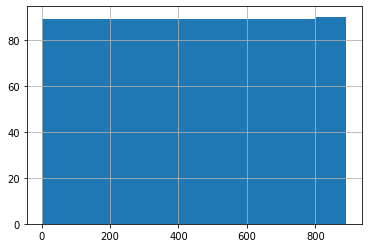

In [36]:
num_data['PassengerId'].hist()

As expected, there is no observable trend the data, let's drop it

In [37]:
num_data = num_data.drop('PassengerId', axis=1)

### Text Cols

In [38]:
txt_data.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

- large number of missing value in Cabin, let's drop it
- only two missing value in Embarked, fill with most freq

In [39]:
txt_data = txt_data.drop('Cabin', axis=1)

In [40]:
txt_data['Embarked'] = txt_data['Embarked'].fillna(txt_data['Embarked'].value_counts().index[0])

In [41]:
txt_data.isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

now let's def the data_cleaning function

In [11]:
def data_clean (df):
    #create lookup table for Age
    psp = df['Pclass'].apply(str)+'-'+df['SibSp'].apply(str)+'-'+df['Parch'].apply(str)
    frame = { 'Pclass_Sibsp_Parch': psp, 'Age': df.Age } 
    psp_age = pd.DataFrame(frame)
    #define age classes, other not yet included
    age_classes = ['3-0-0', '1-0-0', '2-0-0']
    #convert excluding items to 'other'
    psp_age['Pclass_Sibsp_Parch'] = psp_age['Pclass_Sibsp_Parch'].apply(lambda x: x if x in age_classes else 'other')
    #transform to a lookup table
    am_lookup= psp_age.groupby('Pclass_Sibsp_Parch').mean()
    #using the lookup table
    df['temp_psp'] = psp_age['Pclass_Sibsp_Parch'] #setup a temp col with psp lables
    df['temp_age_cat_mean'] = df['temp_psp'] #create a col for age means conversions
    df['temp_age_cat_mean'] = df['temp_age_cat_mean'].apply(lambda x: am_lookup['Age'][x]) #convert values in this col to age means according to the psp lable
    df['Age'] = df['Age'].fillna(df['temp_age_cat_mean']) #fill na according to the tempt mean col
    #drop the temp cols
    df = df.drop('temp_psp', axis=1)
    df = df.drop('temp_age_cat_mean', axis=1)
    
    #found that there are missing valuse in Fare in the test dataset
    df['Fare'] = df['Fare'].fillna(method='ffill')
    
    #for reasons stated above we don't want PassengerId, Cabin cols
    df = df.drop('PassengerId', axis=1)
    df = df.drop('Cabin', axis=1)
    
    #fill na for Embarked, only two 
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])
    
    #do a final check
    print(df.isnull().sum())
    print(df.shape)
    print(df.head())
    
    return df
    

## Feature Engineering

### Numeric Data

In [54]:
num_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.715957,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.165460,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.235556,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations
We have Age and Fare containing continouse valuse
#### Action
For classification problem, we hypothesize that discrete values will be better fit for the algorithms, let's proceed with the conversions

In [90]:
num_data['FareBin'] = pd.qcut(num_data['Fare'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
num_data['AgeBin'] = pd.cut(num_data['Age'].astype(int), 5, labels=[1, 2, 3, 4, 5]).astype(int)
num_data

,Survived,Pclass,Age,SibSp,Parch,Fare,FareBin,AgeBin
0,0,3,22.000000,1,0,7.2500,1,2
1,1,1,38.000000,1,0,71.2833,5,3
2,1,3,26.000000,0,0,7.9250,2,2
3,1,1,35.000000,1,0,53.1000,5,3
4,0,3,35.000000,0,0,8.0500,2,3
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,3,2
887,1,1,19.000000,0,0,30.0000,4,2
888,0,3,26.413452,1,2,23.4500,4,2
889,1,1,26.000000,0,0,30.0000,4,2


In [88]:
#take a look at if the new features are actually useful
num_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FareBin,AgeBin
Survived,1.000000,-0.338481,-0.069834,-0.035322,0.081629,0.257307,0.317783,-0.049771
Pclass,-0.338481,1.000000,-0.379096,0.083081,0.018443,-0.549500,-0.705206,-0.408902
Age,-0.069834,-0.379096,1.000000,-0.255773,-0.188705,0.101817,0.129939,0.940683
SibSp,-0.035322,0.083081,-0.255773,1.000000,0.414838,0.159651,0.354974,-0.238513
Parch,0.081629,0.018443,-0.188705,0.414838,1.000000,0.216225,0.351317,-0.154571
Fare,0.257307,-0.549500,0.101817,0.159651,0.216225,1.000000,0.600883,0.128427
FareBin,0.317783,-0.705206,0.129939,0.354974,0.351317,0.600883,1.000000,0.148150
AgeBin,-0.049771,-0.408902,0.940683,-0.238513,-0.154571,0.128427,0.148150,1.000000


#### Observations
We see that FareBin has a better corrolation with Survived, whereas AgeBin has a lower correlation coefficient than raw Age
#### Action
- We will keep FareBin drop Fare
- For Age vs Agebin, since the difference is small, and both Age and AgeBin are not tightly corrolated with Survived, for the sake of consistency we will keep AgeBin

In [91]:
#now we drop the original features
num_data = num_data.drop(['Fare', 'Age'], axis=1)

In [92]:
num_data

,Survived,Pclass,SibSp,Parch,FareBin,AgeBin
0,0,3,1,0,1,2
1,1,1,1,0,5,3
2,1,3,0,0,2,2
3,1,1,1,0,5,3
4,0,3,0,0,2,3
...,...,...,...,...,...,...
886,0,2,0,0,3,2
887,1,1,0,0,4,2
888,0,3,1,2,4,2
889,1,1,0,0,4,2


### IsAlone and FamilySize
Inspired by the approach taken in the follow Kaggle notebooks, we would like to engineer two new feature IsAlone and FamilySize
- [https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
- https://www.notion.so/Titanic-Data-Science-Solutions-Kaggle-a5a4aa2d5e024be88263390a26db3c6d#81f0bc93036e4f4ab87c1ac22e2d0e2d


In [152]:
FamilySize = num_data['SibSp']+num_data['Parch']+1

In [157]:
IsAlone = FamilySize>1
IsAlone = IsAlone.apply(int)

In [159]:
num_data['IsAlone'] = IsAlone
num_data['FamilySize'] = FamilySize
num_data.corr()

,Survived,Pclass,SibSp,Parch,FareBin,AgeBin,IsAlone,FamilySize
Survived,1.000000,-0.338481,-0.035322,0.081629,0.317783,-0.049771,0.203367,0.016639
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.705206,-0.408902,-0.135207,0.065997
SibSp,-0.035322,0.083081,1.000000,0.414838,0.354974,-0.238513,0.584471,0.890712
Parch,0.081629,0.018443,0.414838,1.000000,0.351317,-0.154571,0.583398,0.783111
FareBin,0.317783,-0.705206,0.354974,0.351317,1.000000,0.148150,0.520277,0.418125
AgeBin,-0.049771,-0.408902,-0.238513,-0.154571,0.148150,1.000000,-0.161040,-0.240237
IsAlone,0.203367,-0.135207,0.584471,0.583398,0.520277,-0.161040,1.000000,0.690922
FamilySize,0.016639,0.065997,0.890712,0.783111,0.418125,-0.240237,0.690922,1.000000


IsAlone has pretty good corrolation with the target

### Text Data

In [94]:
txt_data 

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


#### Observation
Sex and Embarked are ready for labling
Need to work on Name and Ticket

#### Action
- Analysis Name and Ticket
- Impute Sex and Embarked

### Analysis and transform the Name col

#### Observation
Name values are pretty uniformly formatted

#### Action
We could use simple split() to extract the Title values

In [101]:
#borrowed from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy notebook
#quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
txt_data['Title'] = txt_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

txt_data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Mme               1
Sir               1
Capt              1
Jonkheer          1
Ms                1
Don               1
the Countess      1
Name: Title, dtype: int64

In [103]:
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (txt_data['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
txt_data['Title'] = txt_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(txt_data['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


### Analysis and transform the Ticket col

#### Observation
no obvious observable patterns in the data

#### Action
look at value len to see if we could extract some patterns out of it

In [106]:
Ticket_len = txt_data.Ticket.apply(len)

In [108]:
Ticket_len.value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket, dtype: int64

this is much more workable than the raw data, let's apply the same cat approach we did for Title

In [118]:
stat_min_ti = 30
Ticket_len_ls = (Ticket_len.value_counts() < stat_min_ti)
Ticket_len = Ticket_len.apply(lambda x: '30' if Ticket_len_ls.loc[x] == True else x)
Ticket_len.value_counts()

6     419
5     131
30    123
4     101
8      76
10     41
Name: Ticket, dtype: int64

In [121]:
txt_data['Ticket_len'] = Ticket_len
txt_data = txt_data.drop(['Name', 'Ticket'], axis=1)

In [122]:
txt_data

,Sex,Embarked,Title,Ticket_len
0,male,S,Mr,30
1,female,C,Mrs,8
2,female,S,Miss,30
3,female,S,Mrs,6
4,male,S,Mr,6
...,...,...,...,...
886,male,S,Misc,6
887,female,S,Miss,6
888,female,S,Miss,10
889,male,C,Mr,6


In [141]:
#imputer only works on str or numbers
txt_data['Ticket_len'] = txt_data['Ticket_len'].astype(str)

Next we perform data imputation

In [142]:
OH_en = OneHotEncoder(handle_unknown='ignore', sparse=False)
imp_txt_cols = OH_en.fit_transform(txt_data[['Sex','Embarked', 'Title', 'Ticket_len']])
imp_txt_cols = pd.DataFrame(imp_txt_cols)

In [144]:
#now we align the index and col names
imp_txt_cols.index = txt_data[['Sex','Embarked', 'Title', 'Ticket_len']].index
imp_txt_cols.columns = OH_en.get_feature_names(['Sex','Embarked', 'Title', 'Ticket_len'])
imp_txt_cols

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Ticket_len_10,Ticket_len_30,Ticket_len_4,Ticket_len_5,Ticket_len_6,Ticket_len_8
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
#now we complete the txt df with the imputed cols
txt_data = txt_data.drop(['Sex','Embarked', 'Title', 'Ticket_len'], axis=1).join(imp_txt_cols)

KeyError: "['Sex' 'Embarked' 'Title' 'Ticket_len'] not found in axis"

In [148]:
txt_data

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Ticket_len_10,Ticket_len_30,Ticket_len_4,Ticket_len_5,Ticket_len_6,Ticket_len_8
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [150]:
txt_data.corr()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Ticket_len_10,Ticket_len_30,Ticket_len_4,Ticket_len_5,Ticket_len_6,Ticket_len_8
Sex_female,1.000000,-1.000000,0.082853,0.074115,-0.119224,-0.159934,-0.034471,0.686808,-0.867334,0.547600,0.006179,-0.084090,0.010421,0.091776,-0.045475,0.052287
Sex_male,-1.000000,1.000000,-0.082853,-0.074115,0.119224,0.159934,0.034471,-0.686808,0.867334,-0.547600,-0.006179,0.084090,-0.010421,-0.091776,0.045475,-0.052287
Embarked_C,0.082853,-0.082853,1.000000,-0.148258,-0.782742,-0.035225,0.065432,0.026215,-0.072567,0.061395,-0.105869,-0.068141,0.361630,0.026735,-0.339198,0.325325
Embarked_Q,0.074115,-0.074115,-0.148258,1.000000,-0.499421,0.010478,-0.007767,0.171117,-0.078338,-0.089739,-0.048484,-0.123085,-0.097372,0.018938,0.206393,-0.093921
Embarked_S,-0.119224,0.119224,-0.782742,-0.499421,1.000000,0.024264,-0.052433,-0.130650,0.112870,0.002689,0.123257,0.137152,-0.255526,-0.035339,0.167268,-0.225893
Title_Master,-0.159934,0.159934,-0.035225,0.010478,0.024264,1.000000,-0.038326,-0.109844,-0.254903,-0.087580,0.029992,0.038938,0.007963,-0.044095,0.012919,-0.046801
Title_Misc,-0.034471,0.034471,0.065432,-0.007767,-0.052433,-0.038326,1.000000,-0.089565,-0.207843,-0.071411,-0.038825,-0.032784,-0.063208,0.056025,-0.009143,0.086656
Title_Miss,0.686808,-0.686808,0.026215,0.171117,-0.130650,-0.109844,-0.089565,1.000000,-0.595692,-0.204670,-0.004981,-0.057497,0.020804,0.033341,-0.008851,0.024675
Title_Mr,-0.867334,0.867334,-0.072567,-0.078338,0.112870,-0.254903,-0.207843,-0.595692,1.000000,-0.474952,-0.008576,0.070078,0.002834,-0.083562,0.035888,-0.041512
Title_Mrs,0.547600,-0.547600,0.061395,-0.089739,0.002689,-0.087580,-0.071411,-0.204670,-0.474952,1.000000,0.019250,-0.039872,-0.001728,0.078680,-0.043914,0.015478


### Converge to a function
Next, let's converge what we have just done to a single function

In [12]:
def f_eng (clean_data):
    #let's start with num cols
    #create value bins for continuouse values
    clean_data['FareBin'] = pd.qcut(clean_data['Fare'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
    clean_data['AgeBin'] = pd.cut(clean_data['Age'].astype(int), 5, labels=[1, 2, 3, 4, 5]).astype(int)
    #now we drop the original features
    clean_data = clean_data.drop(['Fare', 'Age'], axis=1)
    
    #create new features
    FamilySize = clean_data['SibSp']+clean_data['Parch']+1
    IsAlone = FamilySize>1
    IsAlone = IsAlone.apply(int)
    clean_data['IsAlone'] = IsAlone
    clean_data['FamilySize'] = FamilySize
    
    #next we work on text data
    #extrat title from Name
    clean_data['Title'] = clean_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (clean_data['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    clean_data['Title'] = clean_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    #cat tickets by length
    Ticket_len = clean_data.Ticket.apply(len)
    stat_min_ti = 30
    Ticket_len_ls = (Ticket_len.value_counts() < stat_min_ti)
    Ticket_len = Ticket_len.apply(lambda x: '30' if Ticket_len_ls.loc[x] == True else x)
    Ticket_len.value_counts()
    clean_data['Ticket_len'] = Ticket_len
    #imputer only works on str or numbers
    clean_data['Ticket_len'] = clean_data['Ticket_len'].astype(str)
    clean_data = clean_data.drop(['Name', 'Ticket'], axis=1)
    
    #do imputation on txt data
    OH_en = OneHotEncoder(handle_unknown='ignore', sparse=False)
    imp_cols = OH_en.fit_transform(clean_data[['Sex','Embarked', 'Title', 'Ticket_len']])
    imp_cols = pd.DataFrame(imp_cols)
    #now we align the index and col names
    imp_cols.index = clean_data[['Sex','Embarked', 'Title', 'Ticket_len']].index
    imp_cols.columns = OH_en.get_feature_names(['Sex','Embarked', 'Title', 'Ticket_len'])
    clean_data = clean_data.drop(['Sex','Embarked', 'Title', 'Ticket_len'], axis=1).join(imp_cols)

    return clean_data

### Test our functions

In [169]:
test_data = train_raw.copy()
test_clean = data_clean(test_data)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
(891, 10)
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.

In [170]:
final = f_eng(test_clean)

In [172]:
final.corr()

,Survived,Pclass,SibSp,Parch,FareBin,AgeBin,IsAlone,FamilySize,Sex_female,Sex_male,...,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Ticket_len_10,Ticket_len_30,Ticket_len_4,Ticket_len_5,Ticket_len_6,Ticket_len_8
Survived,1.000000,-0.338481,-0.035322,0.081629,0.317783,-0.049771,0.203367,0.016639,0.543351,-0.543351,...,0.022030,0.327093,-0.549199,0.339040,-0.019137,-0.081703,-0.012868,0.200178,-0.124049,0.097727
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.705206,-0.408902,-0.135207,0.065997,-0.131900,0.131900,...,-0.206333,-0.000576,0.142698,-0.149209,0.027858,0.155894,0.270416,-0.377124,0.157908,-0.324370
SibSp,-0.035322,0.083081,1.000000,0.414838,0.354974,-0.238513,0.584471,0.890712,0.114631,-0.114631,...,-0.036364,0.087932,-0.250489,0.063407,-0.011875,0.084638,-0.031555,0.007149,-0.112502,0.132163
Parch,0.081629,0.018443,0.414838,1.000000,0.351317,-0.154571,0.583398,0.783111,0.245489,-0.245489,...,-0.067480,0.105567,-0.333905,0.225852,0.082150,0.028529,-0.041927,0.003978,-0.033182,0.004982
FareBin,0.317783,-0.705206,0.354974,0.351317,1.000000,0.148150,0.520277,0.418125,0.244943,-0.244943,...,0.112454,0.059106,-0.312117,0.245302,-0.024758,-0.079605,-0.162293,0.263112,-0.194354,0.314787
AgeBin,-0.049771,-0.408902,-0.238513,-0.154571,0.148150,1.000000,-0.161040,-0.240237,-0.093198,0.093198,...,0.176985,-0.242363,0.169465,0.146407,-0.035189,-0.072051,-0.142312,0.182356,-0.062603,0.157564
IsAlone,0.203367,-0.135207,0.584471,0.583398,0.520277,-0.161040,1.000000,0.690922,0.303646,-0.303646,...,-0.049870,0.055127,-0.396920,0.365454,0.018724,0.027469,-0.000926,0.122750,-0.130834,0.031241
FamilySize,0.016639,0.065997,0.890712,0.783111,0.418125,-0.240237,0.690922,1.000000,0.200988,-0.200988,...,-0.058565,0.112838,-0.338014,0.156168,0.032924,0.072100,-0.042513,0.006873,-0.093468,0.092818
Sex_female,0.543351,-0.131900,0.114631,0.245489,0.244943,-0.093198,0.303646,0.200988,1.000000,-1.000000,...,-0.034471,0.686808,-0.867334,0.547600,0.006179,-0.084090,0.010421,0.091776,-0.045475,0.052287
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.244943,0.093198,-0.303646,-0.200988,-1.000000,1.000000,...,0.034471,-0.686808,0.867334,-0.547600,-0.006179,0.084090,-0.010421,-0.091776,0.045475,-0.052287


## Wrap all preprocesses to a single function

In [56]:
def pre_p (train, test):
    train_c = data_clean(train)
    train_f = f_eng(train_c)
    y_train = train_f.Survived
    X_train = train_f.drop('Survived', axis=1)
    
    test_c = data_clean(test)
    test_f = f_eng(test_c)
    X_test = test_f
    
    return X_train, y_train, X_test

In [57]:
X_train, y_train, X_test = pre_p (train_raw, test_raw)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
(891, 10)
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.

In [58]:
X_train

,Pclass,SibSp,Parch,FareBin,AgeBin,IsAlone,FamilySize,Sex_female,Sex_male,Embarked_C,...,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Ticket_len_10,Ticket_len_30,Ticket_len_4,Ticket_len_5,Ticket_len_6,Ticket_len_8
0,3,1,0,1,2,1,2,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,5,3,1,2,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0,2,2,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,5,3,1,2,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,0,0,2,3,0,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,3,2,0,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1,0,0,4,2,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,3,1,2,4,2,1,4,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
889,1,0,0,4,2,0,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
def base_model (X_tr, y_tr):
    #this is from https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
    #Machine Learning Algorithm (MLA) Selection and Initialization
    MLA = [
        #Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier(),

        #Gaussian Processes
        gaussian_process.GaussianProcessClassifier(),

        #GLM
        linear_model.LogisticRegressionCV(),
        linear_model.PassiveAggressiveClassifier(),
        linear_model.RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),

        #Navies Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),

        #Nearest Neighbor
        neighbors.KNeighborsClassifier(),

        #SVM
        svm.SVC(probability=True),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        #Trees    
        tree.DecisionTreeClassifier(),
        tree.ExtraTreeClassifier(),

        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),


        #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
        XGBClassifier()    
        ]
    
    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
    #note: this is an alternative to train_test_split
    #cv_split = model_selection.ShuffleSplit(test_size = .2, train_size = .8, random_state = 0 ) # run model 10x with 80/20 split intentionally leaving out 10%

    #create table to compare MLA metrics
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    #create table to compare MLA predictions
    MLA_predict = y_tr

    #index through MLA and save performance to table
    row_index = 0
    for alg in MLA:

        #set name and parameters
        MLA_name = alg.__class__.__name__
        #print(MLA_name)
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        #print(y_tr.shape)

        #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
        cv_results = model_selection.cross_validate(alg, X_tr, y_tr, cv = 5, scoring='accuracy', return_train_score=True)
        

        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!


        #save MLA predictions - see section 6 for usage
        #alg.fit(X_tr, y_tr)
        #MLA_predict[MLA_name] = alg.predict(X_tr)

        row_index+=1


    #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    return MLA_compare
    #MLA_predict

In [75]:
compare_df = base_model(X_train, y_train)

In [76]:
compare_df

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.833893,0.830507,0.0714191,0.07421
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.838385,0.828278,0.0809773,0.0416834
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.832491,0.828259,0.0622931,0.0867711
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.841192,0.827173,0.0825726,0.531777
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.835579,0.827142,0.0838288,0.0039896
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.862515,0.826062,0.102924,0.06264
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.874578,0.826056,0.0979529,0.110682
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.835298,0.824895,0.0753055,0.00398993
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.89422,0.820438,0.0608934,0.246142
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.866442,0.818204,0.0916285,0.00478706


In [23]:
y_train.shape

(892,)

In [27]:
type(y_train)

pandas.core.series.Series

In [34]:
y_train.tail(1)

AdaBoostClassifier    [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, ...
Name: Survived, dtype: object